# Sample SHAP Explanations

In [5]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shap
from loss import PHMAP

In [3]:
with open('model/trained/xgb_pipe_estimator.pkl', 'rb') as f:
    estimator = pickle.load(f)

X = pd.read_csv('data/phmap_dataset.csv').drop(
            labels=['unit_names', 'hs'],
            axis=1)
y = pd.read_csv('data/ruls.csv').values.reshape(1, -1)[0]
X = estimator.steps[0][1].transform(X)
# X = estimator.steps[1][1].transform(X)
feature_names = estimator.steps[0][1].get_feature_names_out()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=7501)

## Load Shapley Values

For the purposing of demonstration, there's no need to calculate all the Shapley values on this notebook, there's a dedicated `explanations.py` file meant to calculate them when needed; once that's done, just read them.

In [4]:
with open('model/trained/xgb_shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)

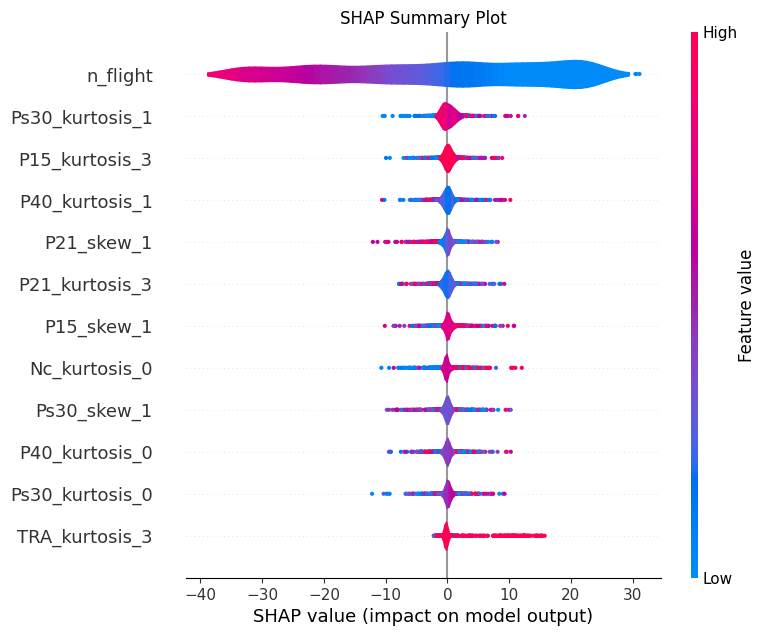

In [6]:
plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values,
                  plot_type='violin',
                  max_display=12,
                  show=False)
plt.title('SHAP Summary Plot')
plt.savefig('img/shap_summary.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

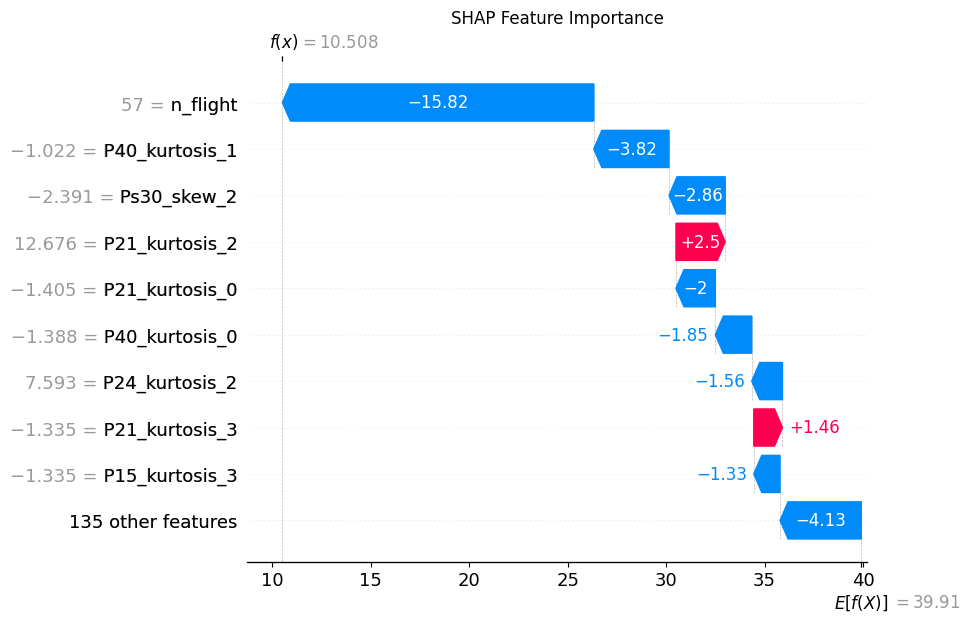

In [10]:
shap.waterfall_plot(shap_values[69],
                    show=False)
plt.title("SHAP Feature Importance")
plt.savefig('img/shap_waterfall_example.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

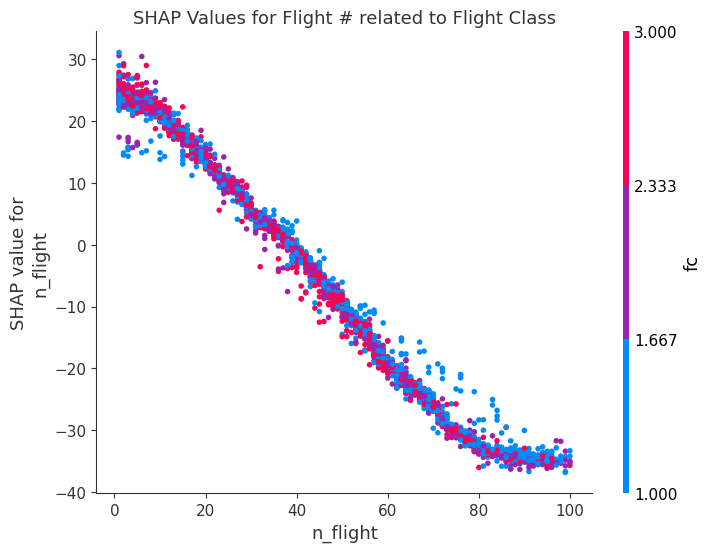

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
shap.dependence_plot(ind='n_flight',
                     interaction_index='fc',
                     shap_values=shap_values.values,
                     features=shap_values.data,
                     feature_names=shap_values.feature_names,
                     ax=ax,
                     title='SHAP Values for Flight # related to Flight Class',
                     show=False)
plt.savefig('img/shap_dependence_flight_number.png',
            dpi=300,
            bbox_inches='tight')
plt.show()